In [1]:
#importing requied libraries
import pandas as pd
import scipy.stats as sp
import numpy as np

In [3]:
#importing dataset
df=pd.read_csv('dataset.csv')

In [4]:
df

,Timestamp,Gender,What time you usually go to bed?,"On average ,how many hours of sleep do you get everyday?",How much hours do you work?,How much you can rate your work efficiency if you sleep good?,"Does sleeping less, effect on work?",On an average how much sleep should a person get if he/she is a working?,Do you use smartphone at bed time?,Purpose of smartphone use at bedtime
0,12/12/2021 23:34:47,Male,12-1 AM,8,8,10,Yes,7,Yes,Social Networking sites
1,12/12/2021 23:43:02,Male,10-11 PM,8,8,9,Yes,8,Yes,Social Networking sites
2,12/13/2021 0:03:00,Female,After 1 AM,7,7,10,No,8,Yes,Social Networking sites
3,12/13/2021 0:49:30,Male,12-1 AM,7,8,9,Yes,8,Yes,Entertainment
4,12/13/2021 12:09:38,Female,11-12 PM,8,8,10,Yes,8,Yes,Other
...,...,...,...,...,...,...,...,...,...,...
58,12/15/2021 18:53:03,Male,11-12 PM,3,3,3,Yes,3,Yes,Entertainment
59,12/15/2021 23:10:11,Male,10-11 PM,6,9,7,No,8,Yes,Web Surfing
60,12/16/2021 13:09:16,Female,12-1 AM,7,9,9,Yes,8,No,Entertainment
61,12/16/2021 20:47:04,Male,11-12 PM,8,8,10,No,6,Yes,Entertainment


In [5]:
df.iloc[:,-2]=df.iloc[:,-2].map({'Yes':1,"No":0})

In [7]:
df.isnull().sum()

Timestamp                                                                    0
Gender                                                                       0
What time you usually go to bed?                                             0
On average ,how many hours of sleep do you get everyday?                     0
How much hours do you work?                                                  0
How much you can rate your work efficiency if you sleep good?                0
Does sleeping less, effect on work?                                          0
On an average how much sleep should a person  get if he/she is a working?    0
Do you use smartphone at bed time?                                           0
Purpose of smartphone use at bedtime                                         0
dtype: int64

To carry out tests we should check whether data is normally distributed or not.

Here we use Shapiro-Wilk test

In [18]:
#Help from Python
from scipy.stats import shapiro

DataToTest =df.iloc[:,3]

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.88, p=0.000017621889128349721431732178
Not a normal distribution


As we can see data is not normally distributed but according to Central limit theorem, irrespective of the distribution of the 
population, sample is normally distributed.
So assuming this we carry out further calculations.

In [19]:
#pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(df.iloc[:,3], df.iloc[:,5])

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.259, p=0.040278
dependent samples


Lets find correlation between dataset

In [21]:
df.corr()

,"On average ,how many hours of sleep do you get everyday?",How much hours do you work?,How much you can rate your work efficiency if you sleep good?,On an average how much sleep should a person get if he/she is a working?,Do you use smartphone at bed time?
"On average ,how many hours of sleep do you get everyday?",1.000000,0.098346,0.259144,0.401204,0.046865
How much hours do you work?,0.098346,1.000000,0.175587,0.326542,-0.184138
How much you can rate your work efficiency if you sleep good?,0.259144,0.175587,1.000000,0.175892,-0.041197
On an average how much sleep should a person get if he/she is a working?,0.401204,0.326542,0.175892,1.000000,-0.059962
Do you use smartphone at bed time?,0.046865,-0.184138,-0.041197,-0.059962,1.000000


The correlation between the required two columns is 0.2591.

**Testing the Significance of the Correlation Coefficient**

Pearson’s correlation coefficient, r, tells us about the strength of the linear relationship between x and y
points on a regression plot. 
However, the reliability of the linear model also depends on how many observed data points are in the sample. We need to look at both the value of the correlation coefficient r and the sample size n,together. 

We perform a hypothesis test of the “significance of the correlation coefficient” to decide whether the linear relationship in the sample data is strong enough to use to model the relationship in the population.

The hypothesis test lets us decide whether the value of the population correlation coefficient ρis “close to 0” or “significantly different from 0”. We decide this based on the sample correlation coefficient r
and the sample size n.


**H0: Sleep doesn't affect the work efficiency**

**H1: Sleep affects the work efficiency**

In [40]:
#All the values were found to be

r=0.25
n=63
dof=62

#Consider 5% of significance level


t_critical is calculated from below table


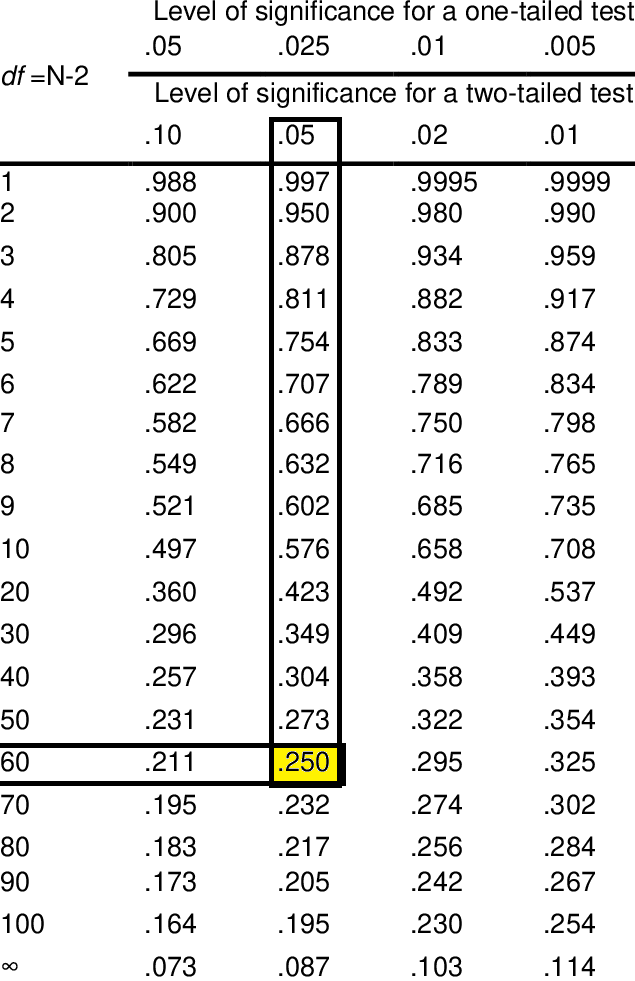

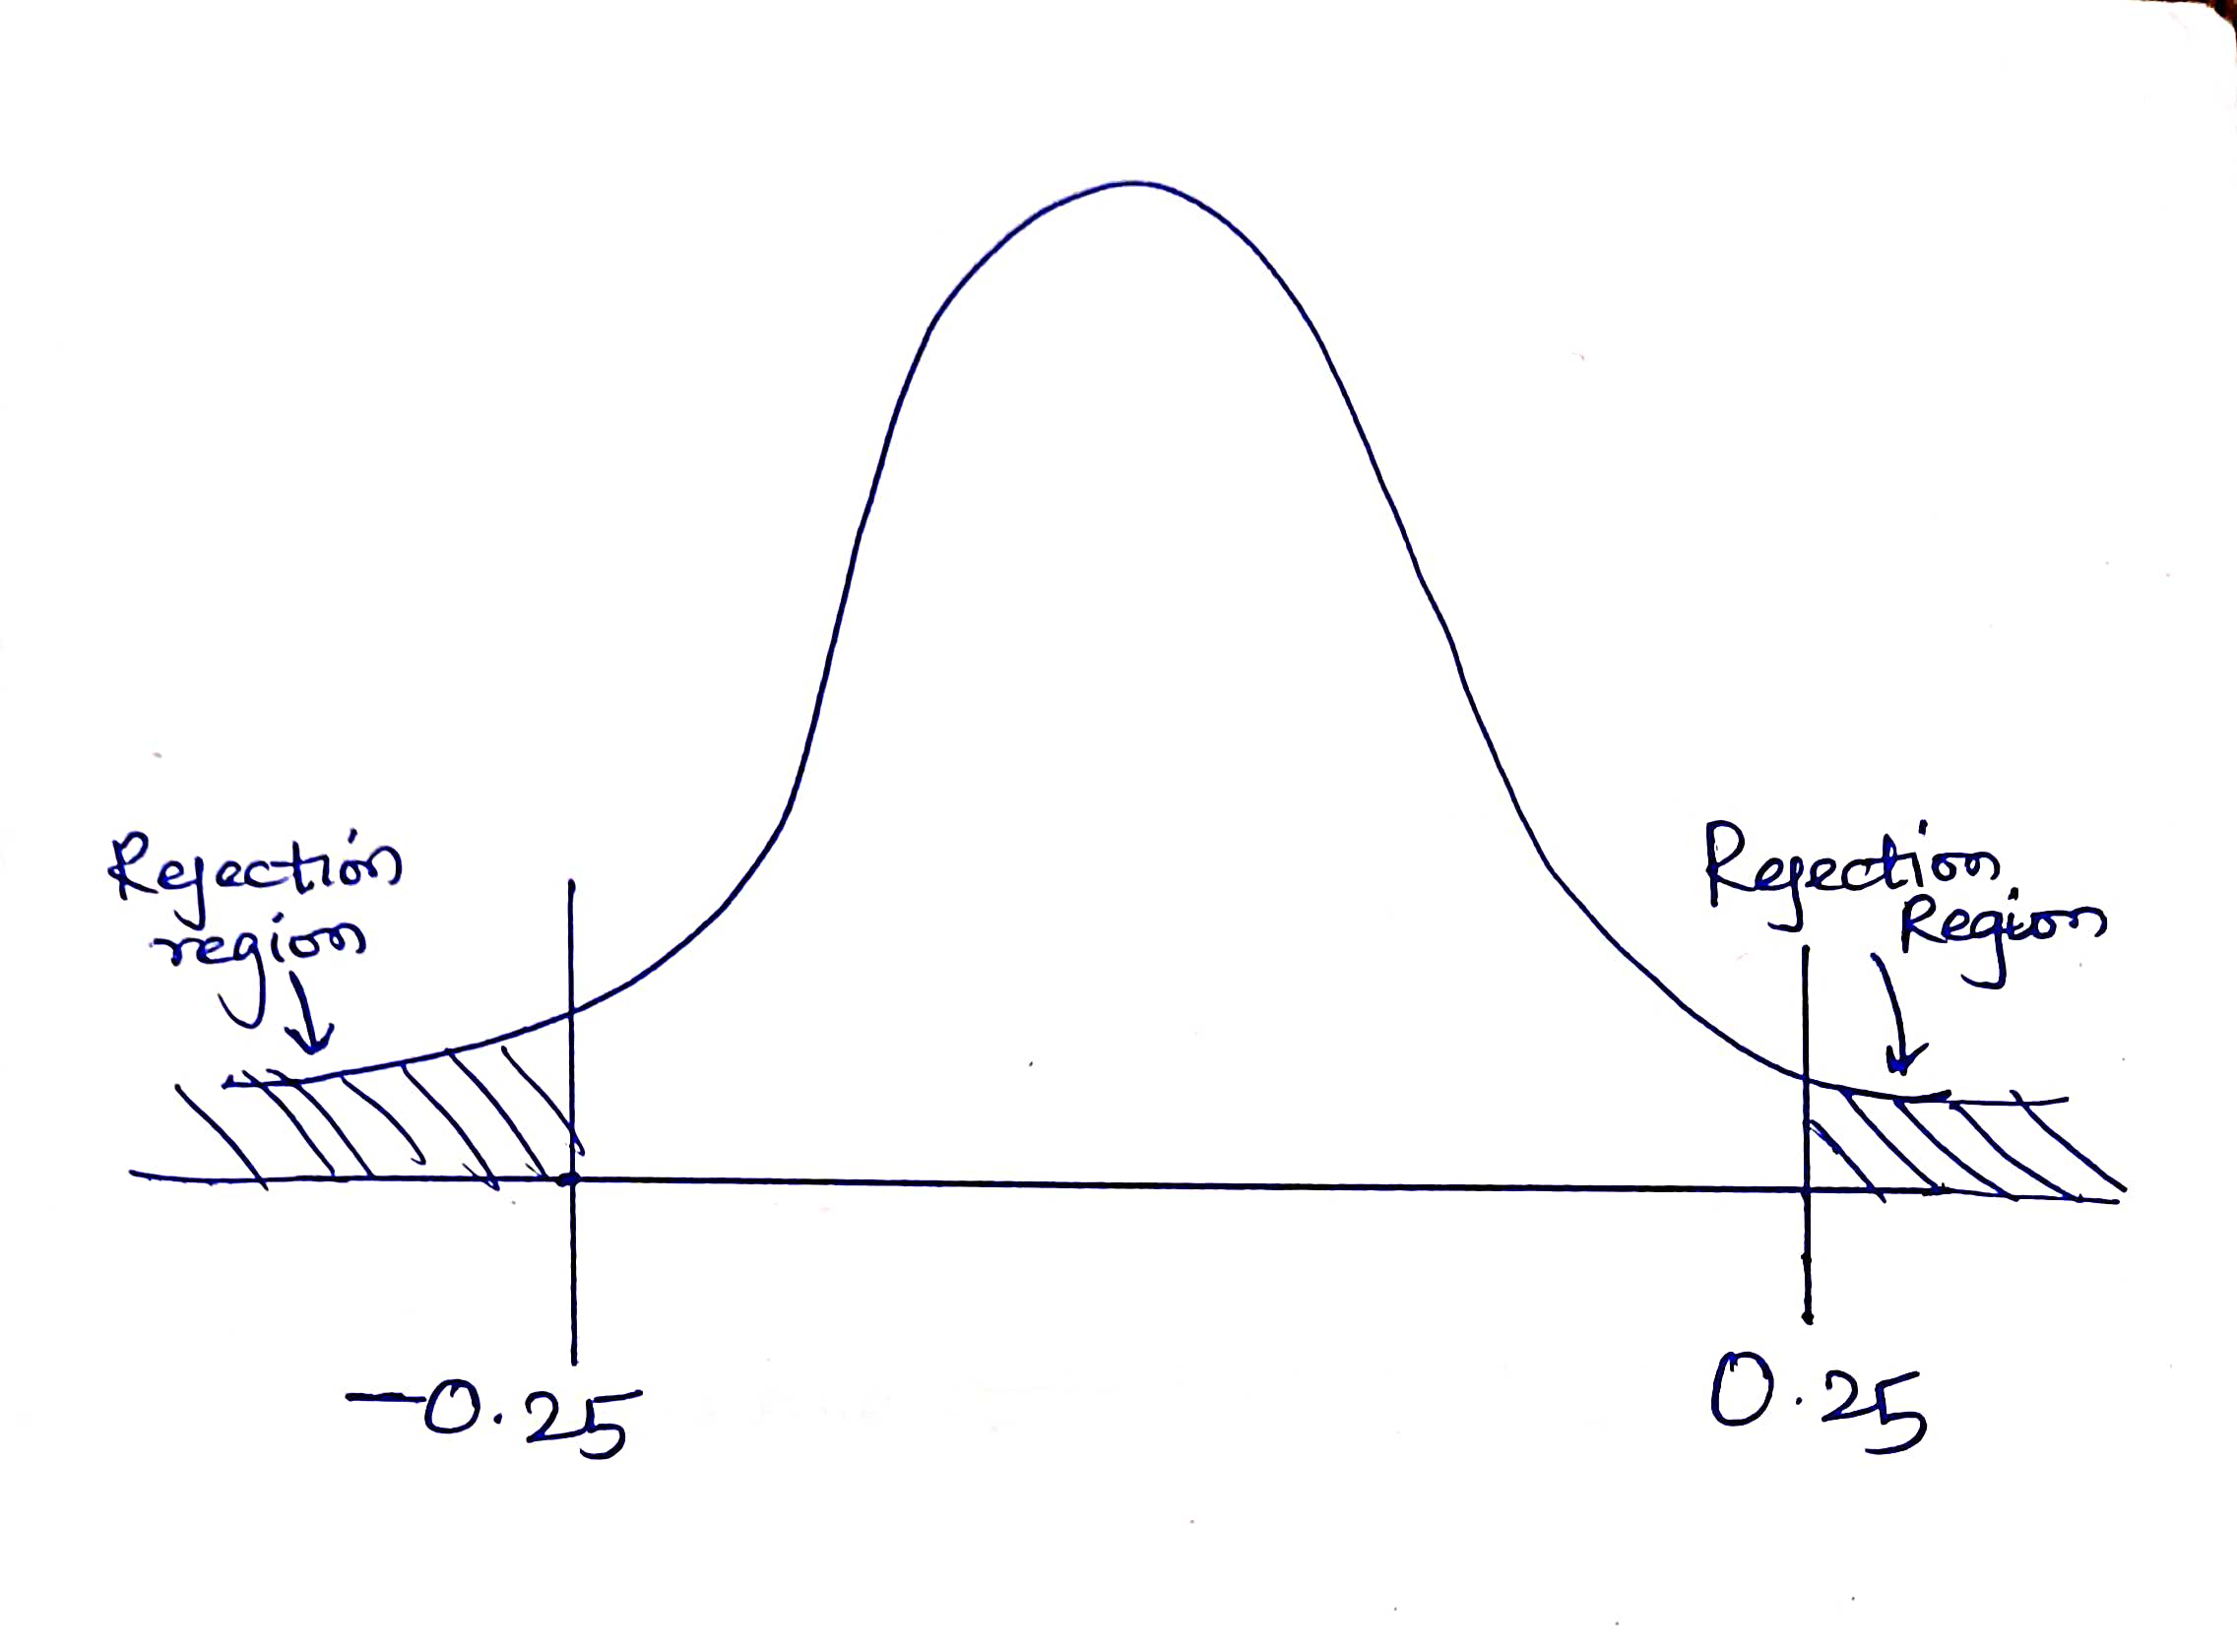

In [42]:
t_actual= (r*(np.sqrt(n-2)))/(np.sqrt(1-r**2))
t_actual

2.016597794967223

t_actual lies in rejection rejection region

Hence, null hypothesis is rejected.

**Conclusion: There is sufficient evidence to conclude that there is a significant linear relationship between sleep quality and work efficiency because the correlation coefficient is significantly different from 0**

Since the significance level is 5%, p_critical=0.05

In [44]:
p_actual=1-sp.t.cdf(2.106,62)
p_actual

0.019630127256329177

Since p_actual< p_critical, null hypothesis is rejected.
**We can statistically say that sleep quality and work efficiency are correlated.**